In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScale
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from sklearn import metrics


In [34]:
# Load data 
data = pd.read_csv("marketing_campaign.csv", sep = "\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [35]:
# data dimension
data.shape

(2240, 29)

# Missing data inspection

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
(2240 - 2216 )/2240

0.010714285714285714

Income has 1.07% NA values. We would drop rows with NaN.

In [36]:
data = data.dropna(how='any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [37]:
data.Z_CostContact.unique()

array([3])

In [38]:
data.Z_Revenue.unique()

array([11])

Drop Z_CostContact and Z_Revenue columns, since these two columns have the same value across all the rows.

In [9]:
data.drop(columns = ['Z_Revenue', 'Z_CostContact'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

# EDA

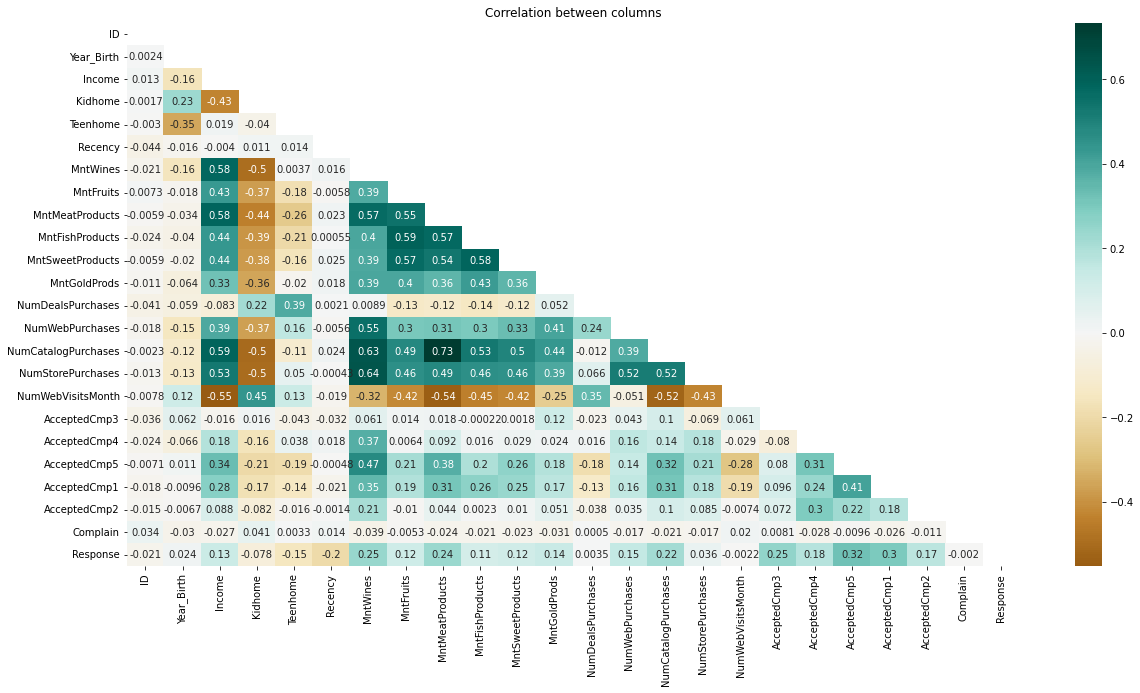

In [30]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),annot=True, cmap="BrBG", center=0, mask = mask)
plt.title("Correlation between columns");

Notice:

- **Amount spent on wine in last two years** is positively correlated (correlation > 0.5) with :

    - the number of purchases made using a catalogue 

    - the number of purchases made directly in stores

    - amount spend on meat in last two years


- **Amount spend on meat in last two years** is positively correlated (correlation > 0.5) with: 

    - the number of purchases made using a catalogue
    
    - amount spend on fish in last two years
    
    - amount spend on sweats in last two years
    
  
- **Amount spend on meat in last two years** is negatively correlated (correlation < -0.5) with:
    
    - number of visits to company's website in the last month
    
    
- **Income** is positively correlated (correlation >0.5) with:
    
    - Amount spent on wine in last 2 years
    
    - Amount spent on meat in last 2 years
    
    - Number of purchases made through the company’s website
    
    
- **Income** is negatively correlated (correlation < - 0.5) with:
    
    - Number of visits to company’s website in the last month    
    

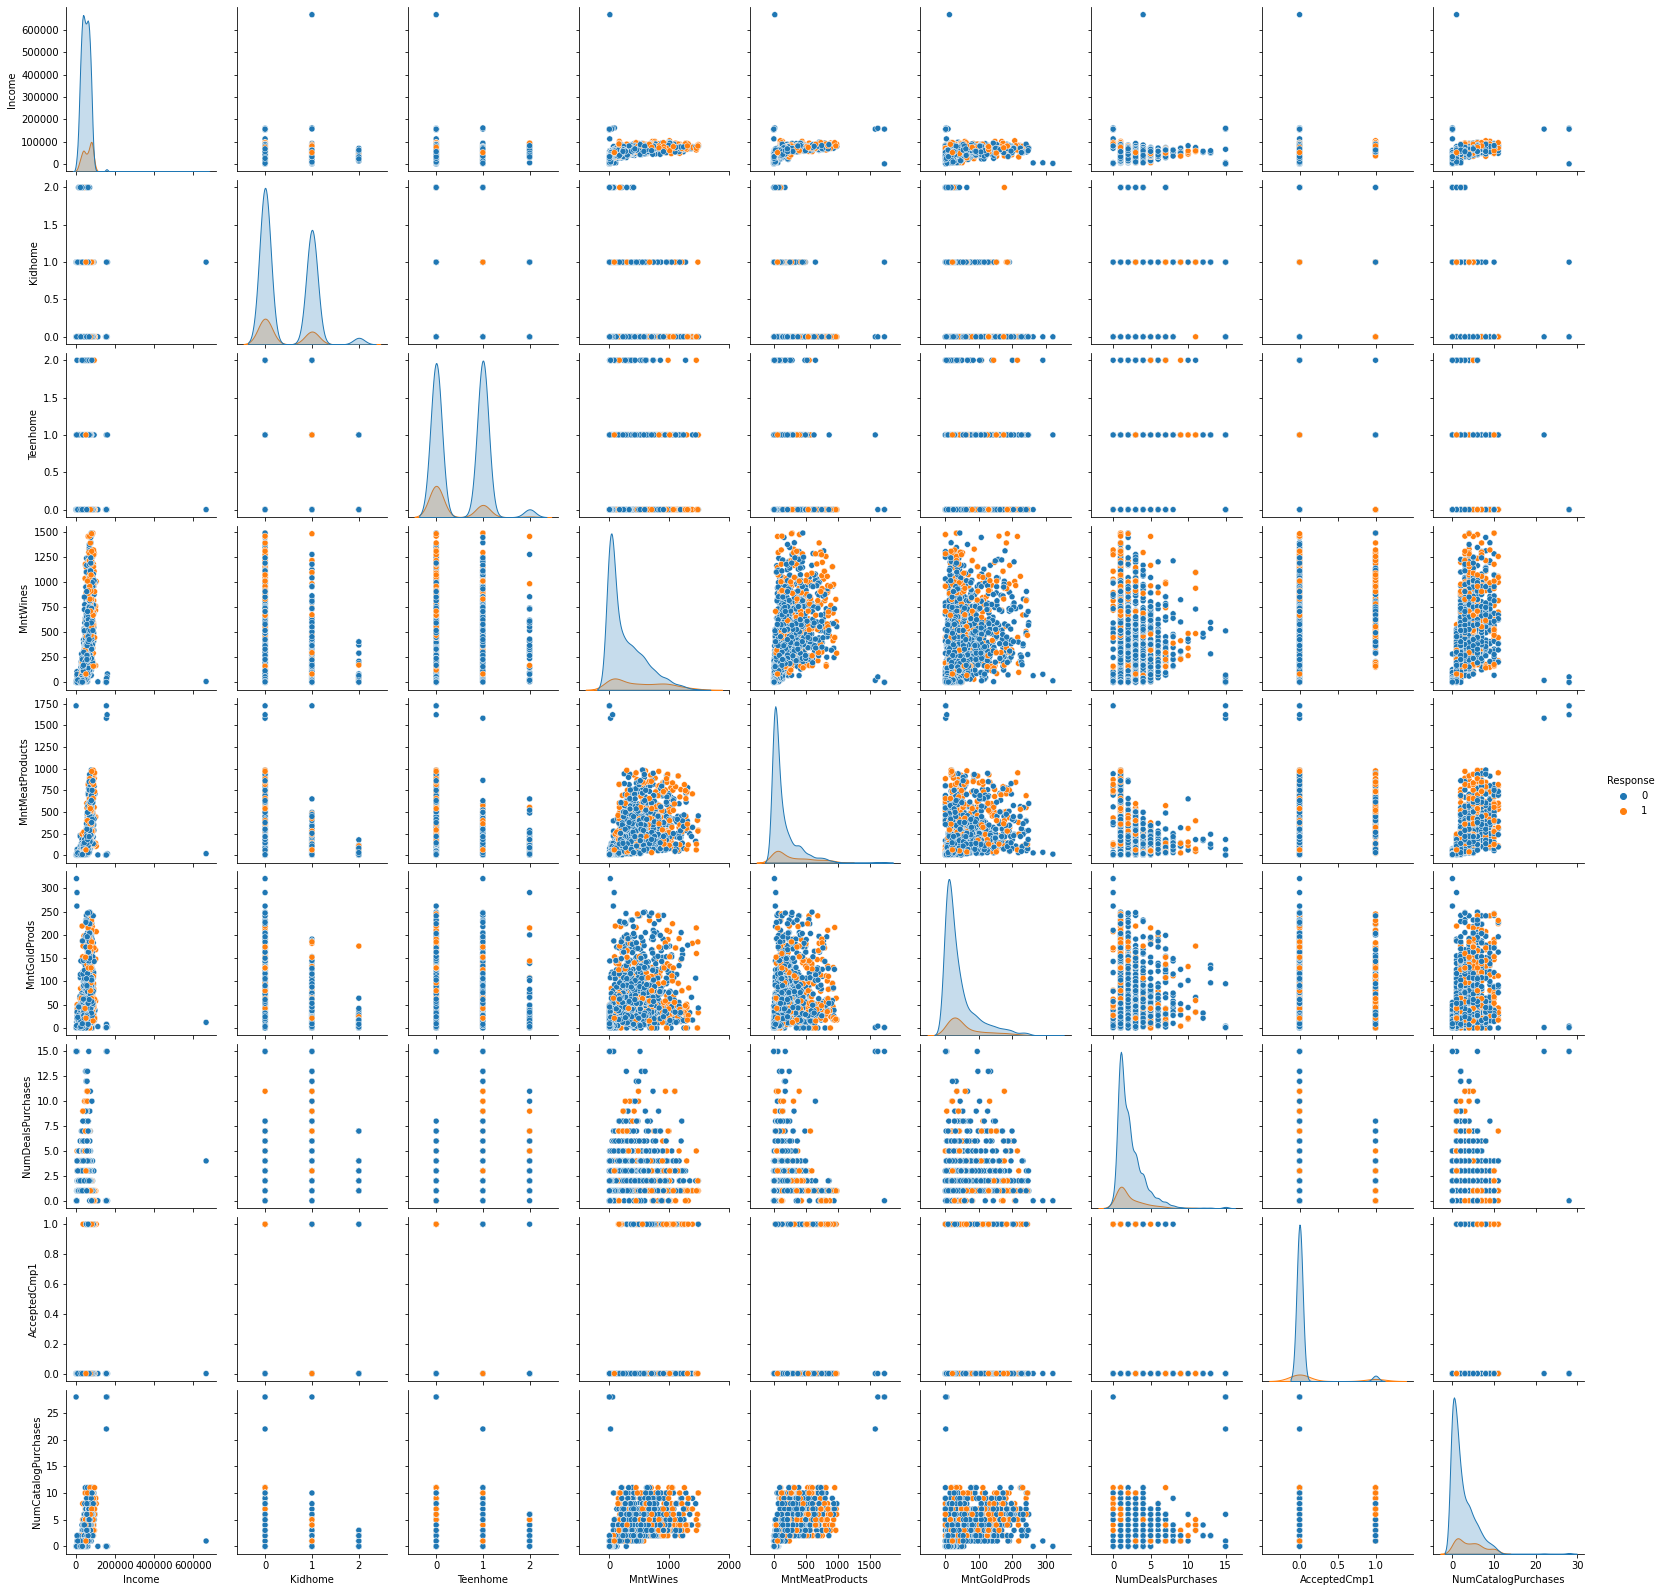

In [31]:
sns.pairplot(data[['Income', 'Education', 'Marital_Status', 'Kidhome', 
                   'Teenhome', 'MntWines', 'MntMeatProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'AcceptedCmp1', 'NumCatalogPurchases', 'Response']],
            hue = 'Response', 
            diag_kind = 'kde');

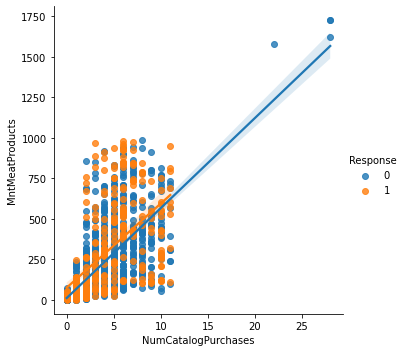

In [32]:
sns.lmplot(x="NumCatalogPurchases", y="MntMeatProducts",  hue = 'Response', data=data);

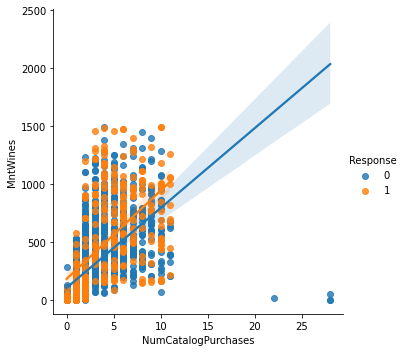

In [33]:
sns.lmplot(x="NumCatalogPurchases", y="MntWines", hue = 'Response', data=data);

Since there's no clear separation between customers using only two variables, we need to try clustering to get a more clear customer segmentation.

# Feature Engineering

In [39]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [40]:
# RFM analysis

data['Max_date'] = data['Dt_Customer'] + data.Recency.apply(lambda x:pd.Timedelta(x, unit='D'))
#data['Max_date'].sort_values(ascending =False)

Today is: 2015-03-02.

In [41]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Max_date'],
      dtype='object')

In [42]:
data['Customer_life_time'] = pd.to_datetime("2015-03-02") - data["Dt_Customer"]
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Max_date,Customer_life_time
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,2012-06-06,1057 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,2014-09-10,211 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013-09-16,558 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,2014-10-28,151 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014-04-23,407 days


In [43]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
#["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)


In [44]:
# remove outliers
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [45]:
data.dropna(how = 'any',inplace =True)

# Data preprocessing

The following steps are applied to preprocess the data:

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction

In [46]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [47]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [48]:
data["Customer_life_time"] = data["Customer_life_time"].dt.days.astype('int')
data["Income"] = data["Income"].astype('int')

In [49]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions, since this would be used for
# future application of the clusters we created
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response', 'Max_date']
ds = ds.drop(cols_del, axis=1)
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [50]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_life_time,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,0.692181,0.0,0.0,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.132545,0.0,0.0,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.544908,0.0,0.0,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,0.279818,0.0,0.0,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,-0.132545,0.0,0.0,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


# dimensionality reduction

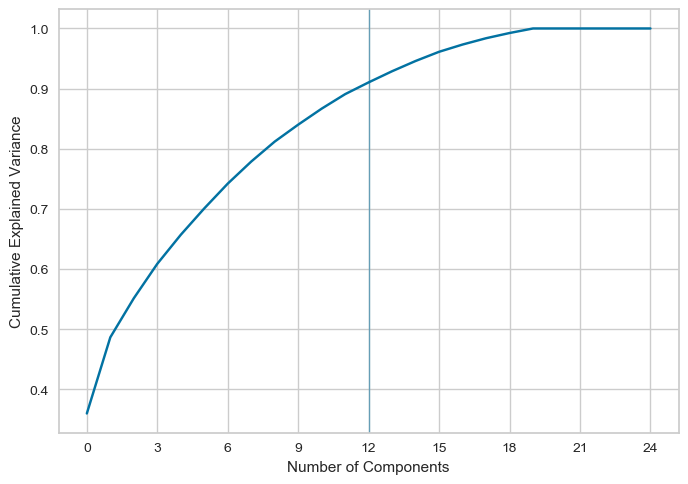

In [51]:
# Cumilative Variance Explained
ax = plt.figure().gca()
pca = PCA().fit(scaled_ds)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=12, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

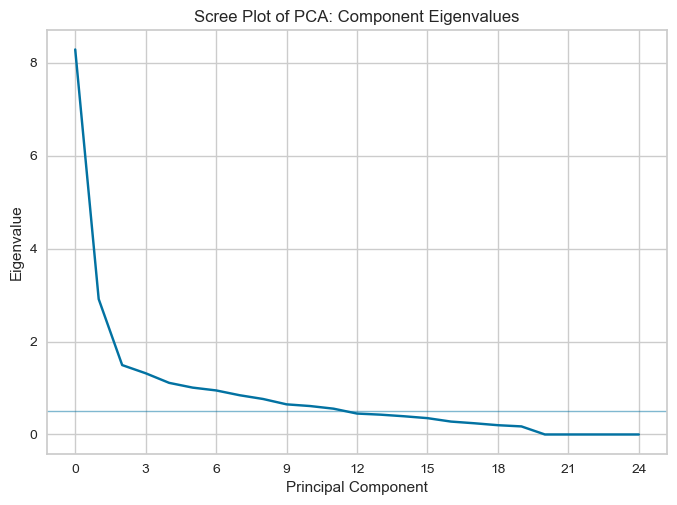

In [52]:
#Scree Plot
ax = plt.figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=0.5, linewidth=1, color='b', alpha=0.5)
plt.title('Scree Plot of PCA: Component Eigenvalues')
plt.show()

In [53]:
#fit pca
pca = PCA(n_components=12)
pca_fit = pca.fit_transform(scaled_ds)
df_pca = pd.DataFrame(data = pca_fit, columns = ['PC '+ str(i+1) for i in range(12)])
df_pca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12
0,4.994347,-0.151247,2.647792,-0.151491,0.991784,-0.574264,-0.624872,-1.114653,1.830784,0.817346,1.035748,-0.581437
1,-2.884455,-0.006676,-1.863861,-1.472022,1.788765,0.549587,0.064884,-0.032784,0.733179,0.541116,0.298175,-0.461595
2,2.617864,-0.720770,-0.252259,-0.034561,-0.641760,0.599061,-1.615866,0.057634,-0.742981,-0.543140,0.939822,-0.151452
3,-2.676036,-1.541974,-0.922759,1.190909,0.585116,1.057183,-0.589718,1.113229,-0.989177,0.134882,0.605317,0.122683
4,-0.649591,0.209848,-0.021028,1.659558,0.289104,-0.944834,1.388581,0.660560,-0.889756,0.321708,1.152065,0.747197
...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2.321341,2.436277,0.518645,0.652558,0.598568,0.112828,-1.458323,-1.118143,-2.031768,1.068882,-1.166875,-1.478032
2208,-3.105957,4.020968,-1.499273,0.473705,0.064328,0.237460,1.391919,0.986476,0.254189,1.642890,2.560521,-1.133273
2209,2.673666,-1.869157,0.594264,-1.046906,0.833747,-1.197525,0.193778,1.947638,-0.722190,-1.064559,0.195292,0.155953
2210,1.494055,1.701855,-1.627265,-0.531814,-0.965947,1.415128,-0.046320,-0.341249,-0.407117,0.058453,-0.109983,0.100378


**From the above analysis, we choose 12 PCA coomponents**

# Clustering

## Kmeans Clustering

In [54]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

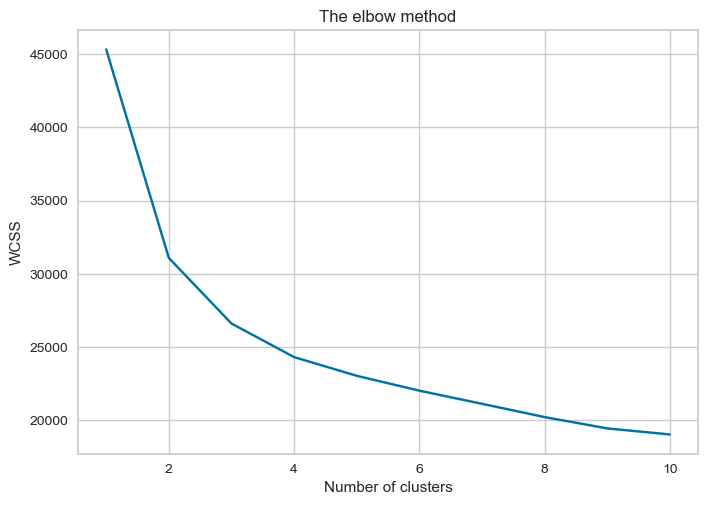

In [55]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [56]:
# k = 4
Kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = Kmeans.fit(df_pca)

In [57]:
scaled_ds['Kmeans'] = pd.Series(y_pred.labels_, index = scaled_ds.index)

In [58]:
scaled_ds['Kmeans'].value_counts()

2    598
3    580
0    527
1    507
Name: Kmeans, dtype: int64

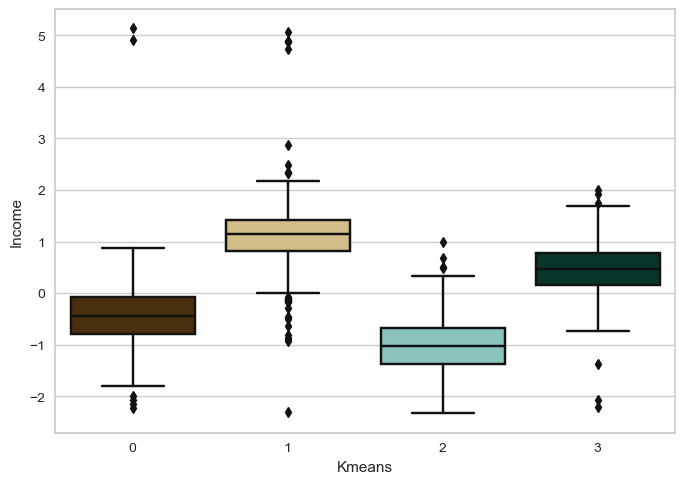

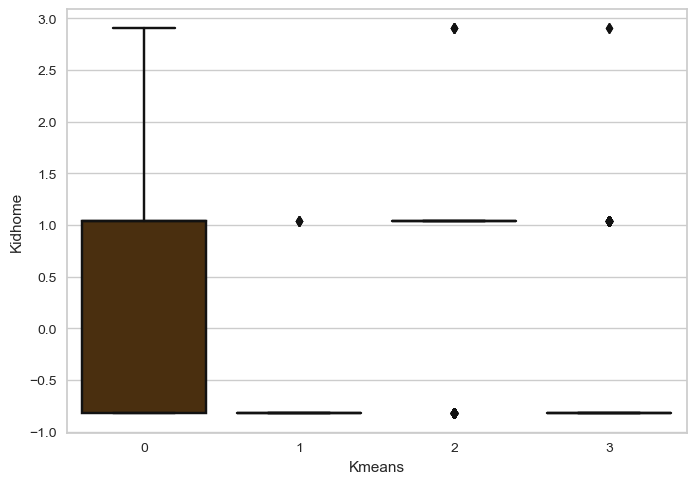

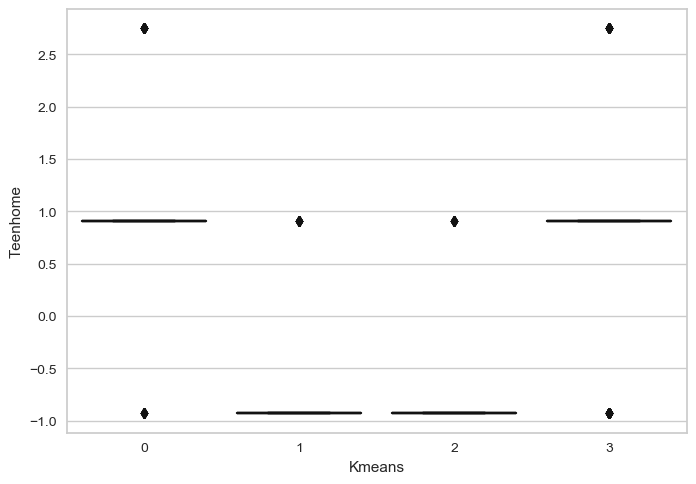

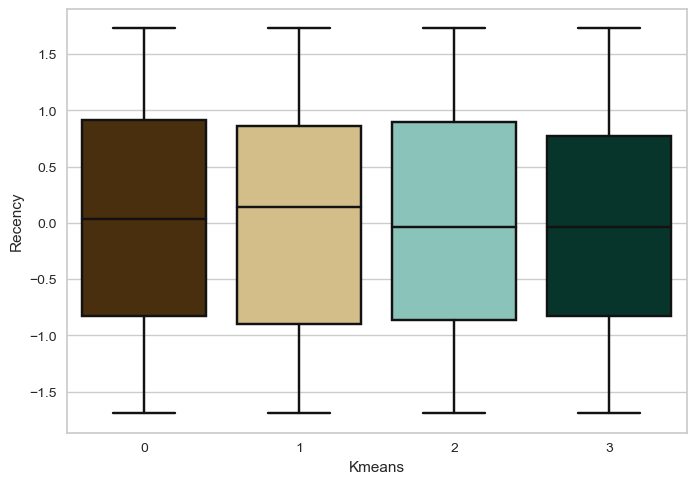

In [87]:
#Plotting countplot of clusters
pal = ["#543005", "#DFC27D", "#80CDC1","#003C30"]
for i in range(5):
    if i == 0: continue #skip locationabbr when plotting
    sns.boxplot(x='Kmeans', y=scaled_ds.iloc[:, i], data=scaled_ds,palette=pal)
    plt.show()

#### Analysis Of K-Means Results
- K-Means clustering method considers two assumptions regarding the clusters:
    - clusters are spherical. Spherical assumption helps in separating the clusters when the algorithm works on the data and forms clusters.
    - clusters are of similar size. 
- The dataset may not meet these assumptions, so the results from Kmeans do not show clear separation among clusters.

## Agglomerative clustering

In [60]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df_pca)
df_pca["AC_Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
scaled_ds["AC_Clusters"]= yhat_AC

In [61]:
#A 3D Projection Of Data In The Reduced Dimension
x =df_pca["PC 1"]
y =df_pca["PC 2"]
z =df_pca["PC 3"]

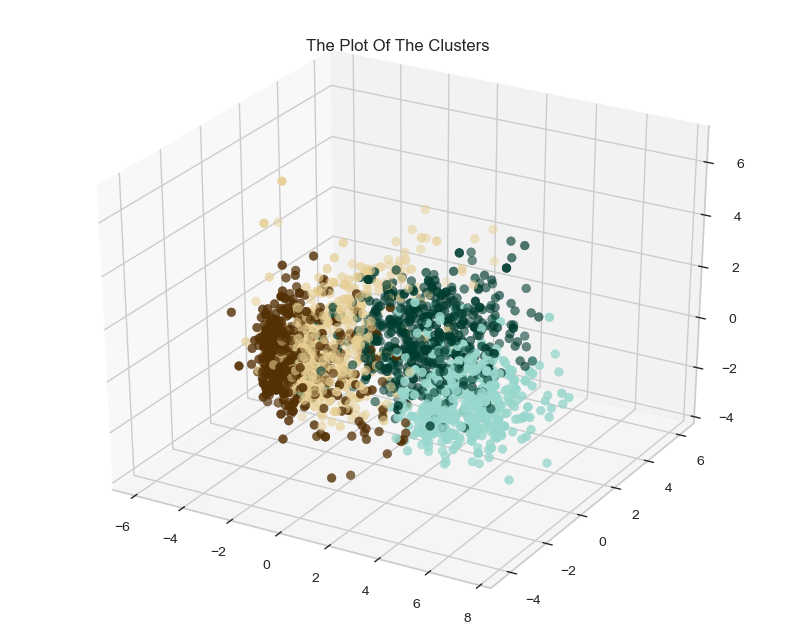

In [62]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["AC_Clusters"], marker='o', cmap = "BrBG" )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Agglomerative Cluster Analysis

In [65]:
data["AC_Clusters"]= yhat_AC

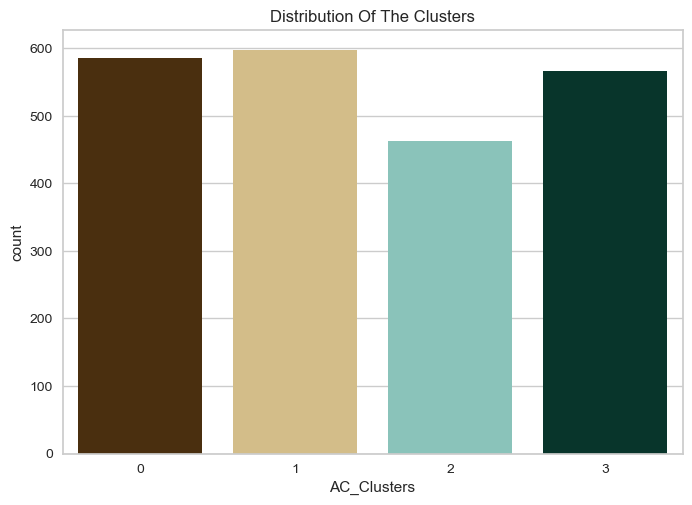

In [66]:
#Plotting countplot of clusters
pal = ["#543005", "#DFC27D", "#80CDC1","#003C30"]
pl = sns.countplot(x=data["AC_Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

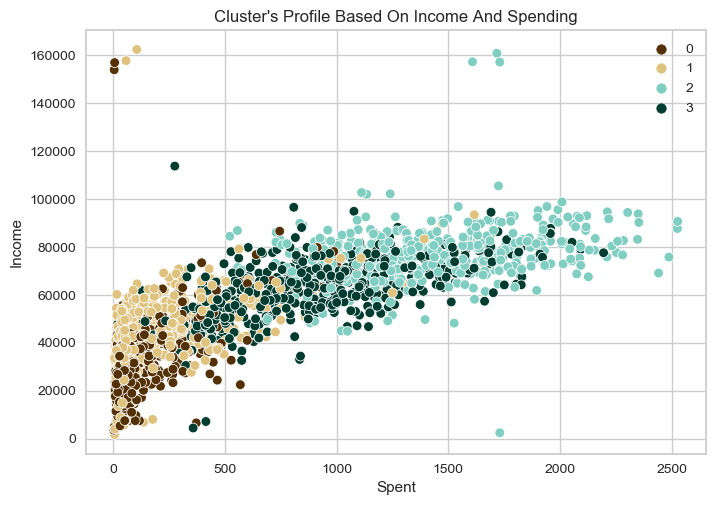

In [67]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["AC_Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### Cluster profile based on income and spending:

- group 0: Low income and low spending group
- group 1: Average income and low spending group
- group 2: High income and high spending group
- group 3: High income and average spending group

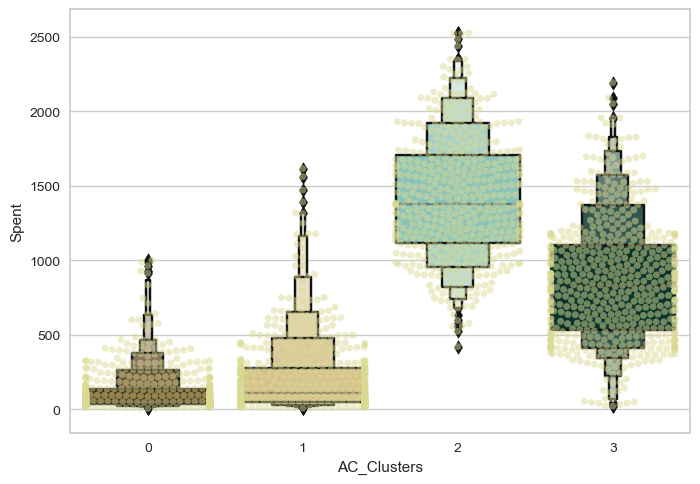

In [80]:
# spent plot
plt.figure()
pl=sns.swarmplot(x=data["AC_Clusters"], y=data["Spent"], color= "#DBDA94", alpha=0.5 )
pl=sns.boxenplot(x=data["AC_Clusters"], y=data["Spent"], palette=pal)
plt.show()

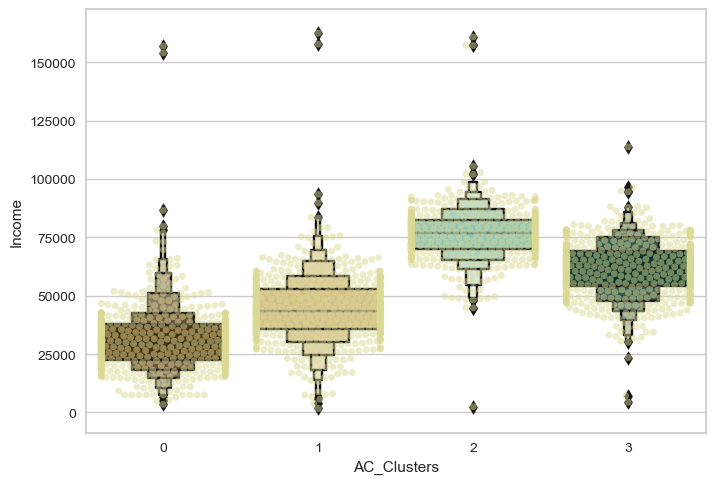

In [78]:
# income plot
plt.figure()
pl=sns.swarmplot(x=data["AC_Clusters"], y=data["Income"], color= "#DBDA94", alpha=0.5 )
pl=sns.boxenplot(x=data["AC_Clusters"], y=data["Income"], palette=pal)
plt.show()

In [81]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Max_date', 'Customer_life_time', 'Age',
       'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'AC_Clusters'],
      dtype='object')

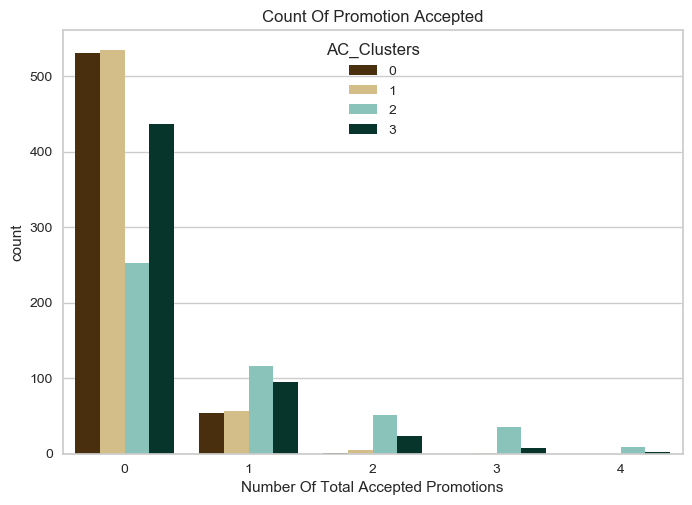

In [83]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["AC_Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

- The majority of participants do not accpet the promotions campaigns.
- We find that group 2 and group 3 accepts our promotions more.
- group 2: High income and high spending group.
- group 3: High income and average spending group.

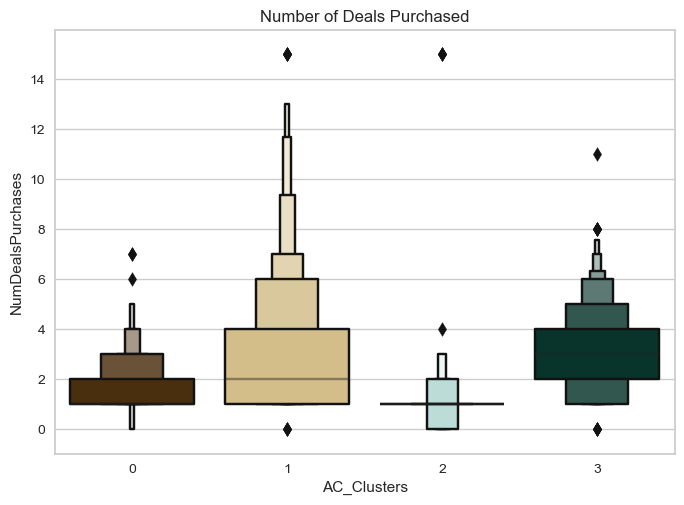

In [84]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["AC_Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

- For the deals, they appeal most to group 1(Average income and low spending group) and 3.
- However, our best customers cluster 2 are not attracted by deals.

<Figure size 800x550 with 0 Axes>

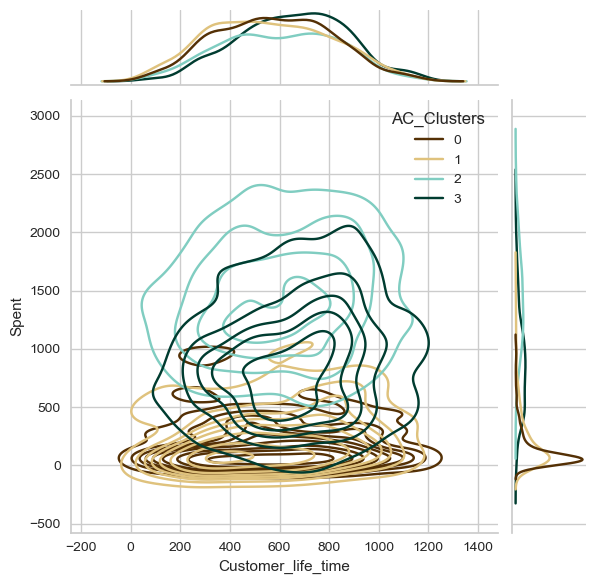

<Figure size 800x550 with 0 Axes>

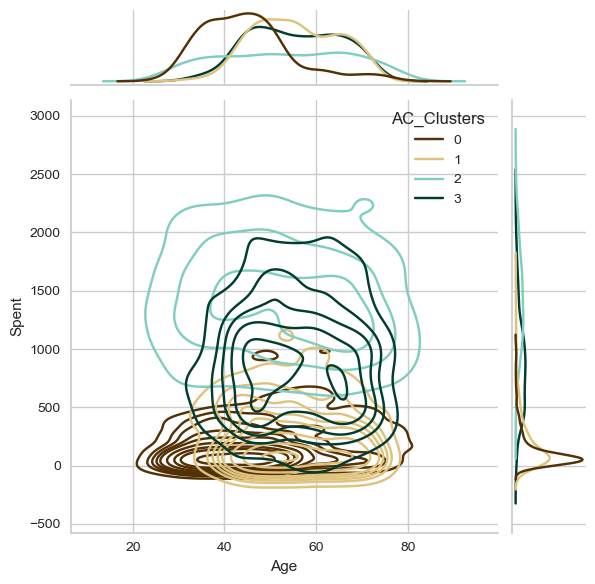

<Figure size 800x550 with 0 Axes>

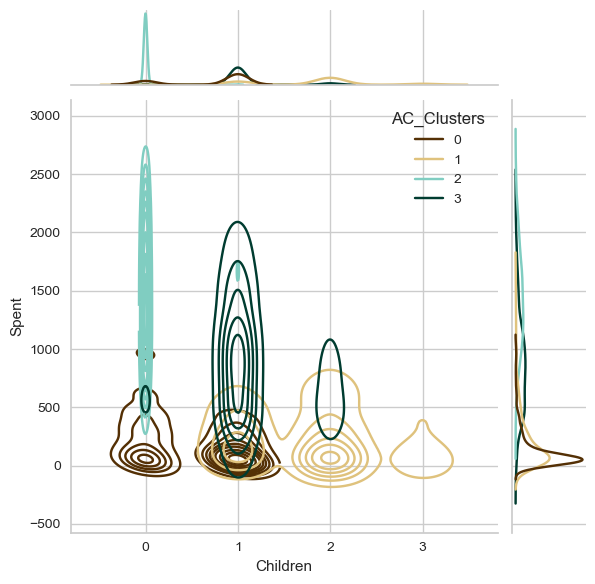

<Figure size 800x550 with 0 Axes>

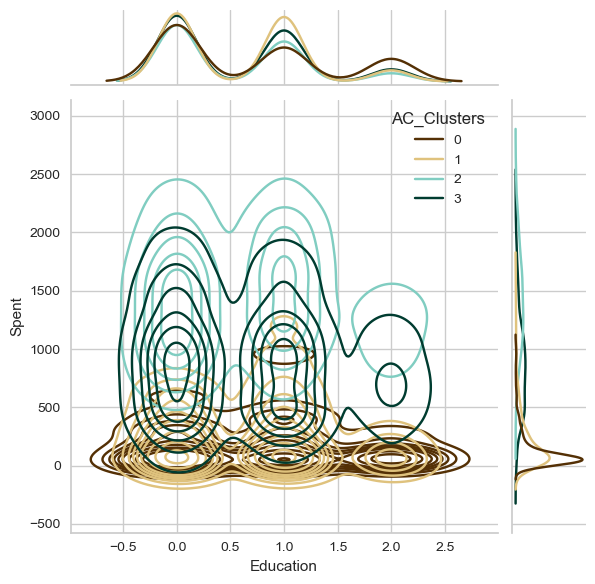

<Figure size 800x550 with 0 Axes>

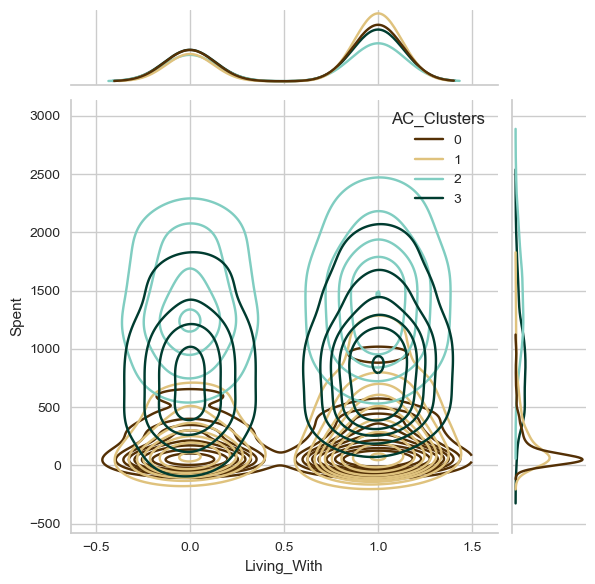

In [97]:
Personal = [ "Customer_life_time", "Age", "Children", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["AC_Clusters"], kind="kde", palette=pal)
    plt.show()

### Cluster Characteristic
- Group 0:
    - The majority of group 0 is relatively young and below 50 years old
    - 0 or 1 children
- Group 1:
    - The customers in this group are relatively older
    - have children
- Group 2:
    - This group spans all ages
    - no children
- Group 3:
    - The customers in this group are relatively older
    - 1 or 2 children

In [98]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Max_date', 'Customer_life_time', 'Age',
       'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'AC_Clusters', 'Total_Promos'],
      dtype='object')

<Figure size 800x550 with 0 Axes>

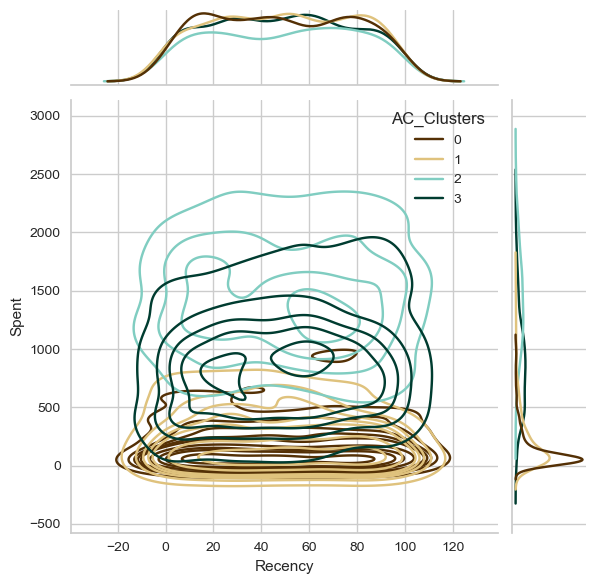

<Figure size 800x550 with 0 Axes>

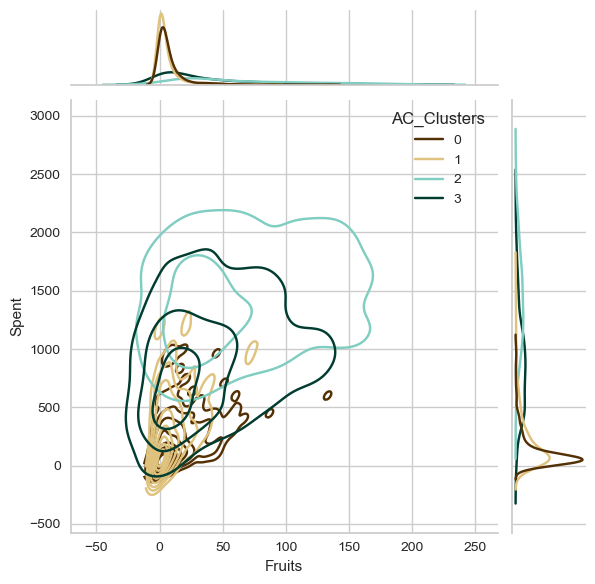

<Figure size 800x550 with 0 Axes>

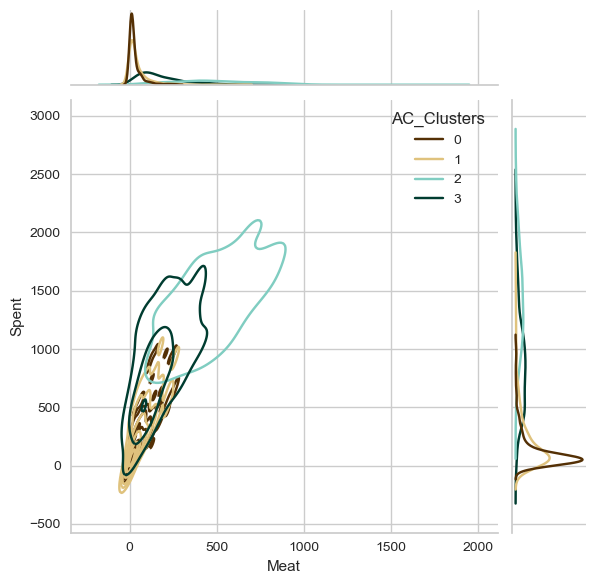

<Figure size 800x550 with 0 Axes>

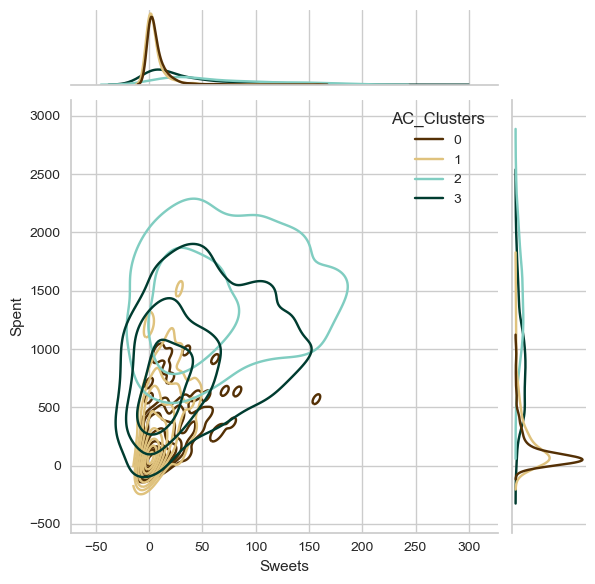

<Figure size 800x550 with 0 Axes>

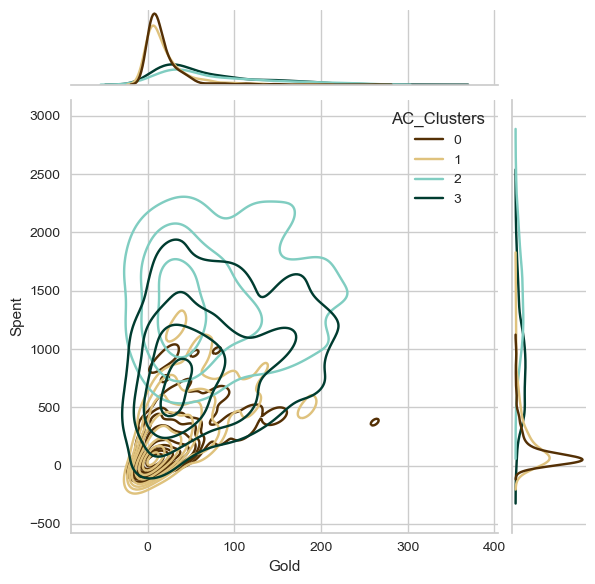

In [99]:
Personal = [ "Recency", "Fruits", "Meat", "Sweets","Gold"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["AC_Clusters"], kind="kde", palette=pal)
    plt.show()

## Purchase Analysis
- Group 2 and Group 3 buys more frequently than group 0 and group 1

# Summary of Clusters

- Grouping criteria:
    - group 0: Low income and low spending group
    - group 1: Average income and low spending group
    - group 2: High income and high spending group
    - group 3: High income and average spending group
- Campaign responsiveness by group:
    - The majority of participants do not accpet the promotions campaigns.
    - We find that group 2 and group 3 accepts our promotions more.
- Deal responsiveness by group:
    - For the deals, they appeal most to group 1(Average income and low spending group) and 3.
    - However, our best customers cluster 2 are not attracted by deals.
- Cluster Characteristic
- Group 0:
    - The majority of group 0 is relatively young and below 50 years old
    - 0 or 1 children
- Group 1:
    - The customers in this group are relatively older
    - have children
- Group 2:
    - This group spans all ages
    - no children
- Group 3:
    - The customers in this group are relatively older
    - 1 or 2 children

## DBSCAN Clustering

In [119]:
df_pca1 = df_pca.copy()
df_pca1.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,AC_Clusters,DB_Clusters
0,4.994347,-0.151247,2.647792,-0.151491,0.991784,-0.574264,-0.624872,-1.114653,1.830784,0.817346,1.035748,-0.581437,2,"DBSCAN(eps=3, min_samples=2)"
1,-2.884455,-0.006676,-1.863861,-1.472022,1.788765,0.549587,0.064884,-0.032784,0.733179,0.541116,0.298175,-0.461595,1,"DBSCAN(eps=3, min_samples=2)"
2,2.617864,-0.720770,-0.252259,-0.034561,-0.641760,0.599061,-1.615866,0.057634,-0.742981,-0.543140,0.939822,-0.151452,2,"DBSCAN(eps=3, min_samples=2)"
3,-2.676036,-1.541974,-0.922759,1.190909,0.585116,1.057183,-0.589718,1.113229,-0.989177,0.134882,0.605317,0.122683,0,"DBSCAN(eps=3, min_samples=2)"
4,-0.649591,0.209848,-0.021028,1.659558,0.289104,-0.944834,1.388581,0.660560,-0.889756,0.321708,1.152065,0.747197,0,"DBSCAN(eps=3, min_samples=2)"


In [160]:
#search for parameters
range_eps = [1,2,3,4,5,6]
for i in range_eps:
    print("min_samples: "+str(i))
    DB = DBSCAN(eps=6, min_samples=i).fit(df_pca1.iloc[:,:-2])
    labels = DB.labels_
    silhoutte = silhouette_score(df_pca1.iloc[:,:-2],labels)
    print("silhouette_score: "+str(silhoutte))
    print("Number of Cluster: "+str(len(set(labels))))
    

min_samples: 1
silhouette_score: 0.36235570652000315
Number of Cluster: 4
min_samples: 2
silhouette_score: 0.36235570652000315
Number of Cluster: 4
min_samples: 3
silhouette_score: 0.4358430549844892
Number of Cluster: 3
min_samples: 4
silhouette_score: 0.49393968086627216
Number of Cluster: 2
min_samples: 5
silhouette_score: 0.49393968086627216
Number of Cluster: 2
min_samples: 6
silhouette_score: 0.49393968086627216
Number of Cluster: 2


In [161]:
clustering = DBSCAN(eps=6, min_samples=2).fit(df_pca1.iloc[:,:-2])
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [162]:
df_pca["DB_Clusters"] = clustering.labels_
#Adding the Clusters feature to the orignal dataframe.
scaled_ds["DB_Clusters"]= clustering.labels_

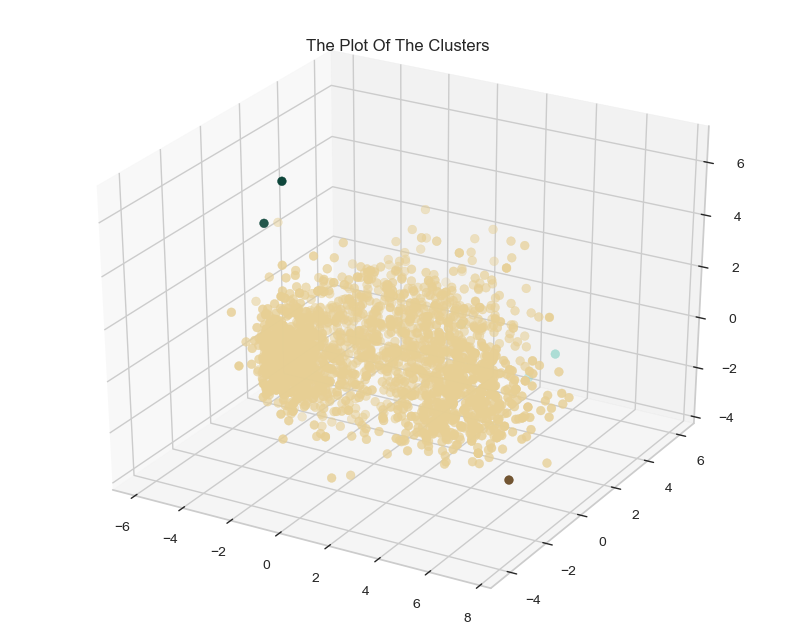

In [163]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["DB_Clusters"], marker='o', cmap = "BrBG" )
ax.set_title("The Plot Of The Clusters")
plt.show()

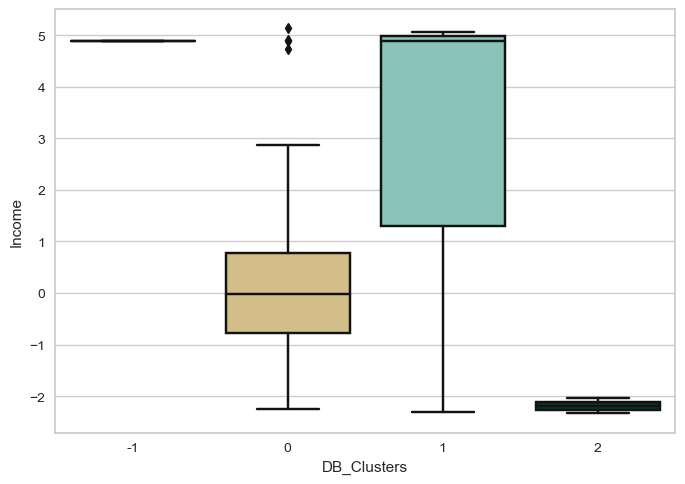

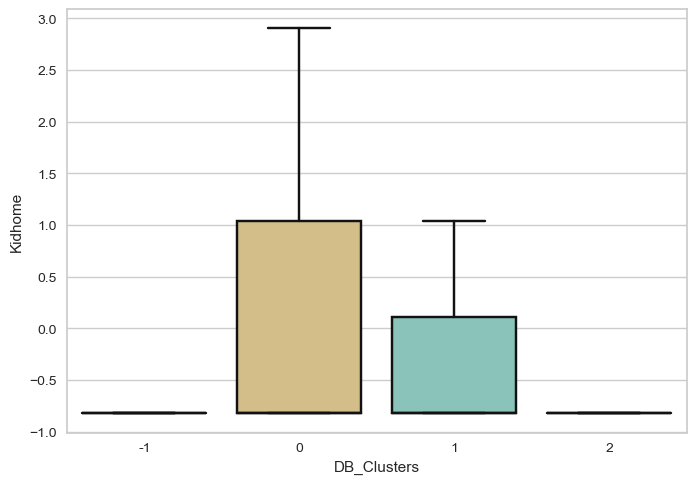

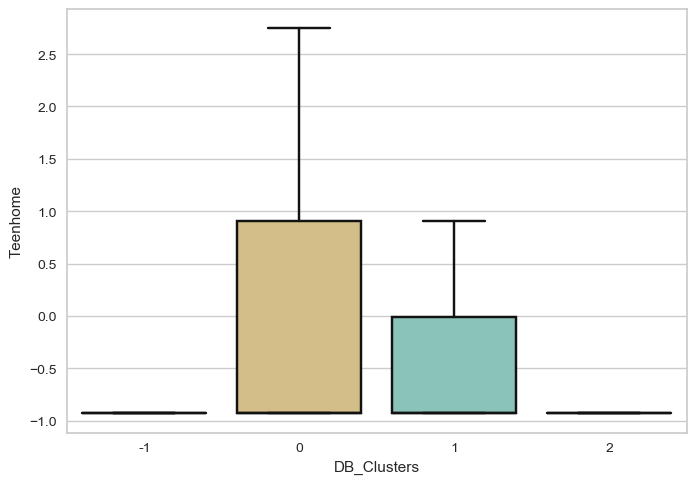

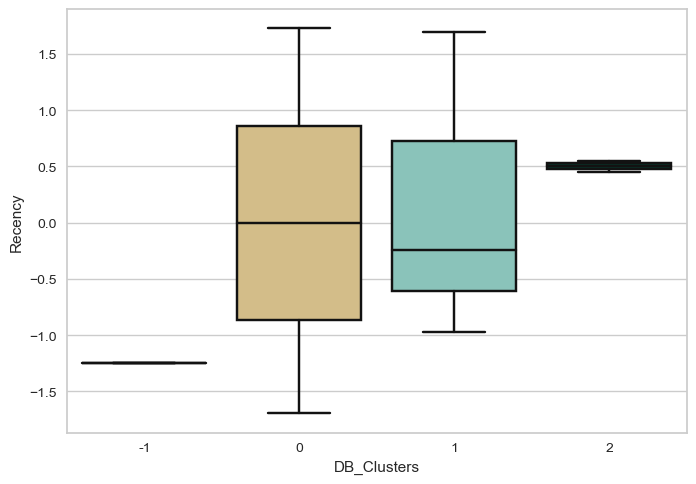

In [164]:
#Plotting countplot of clusters
for i in range(5):
    if i == 0: continue #skip locationabbr when plotting
    sns.boxplot(x='DB_Clusters', y=scaled_ds.iloc[:, i], data=scaled_ds,palette=pal)
    plt.show()

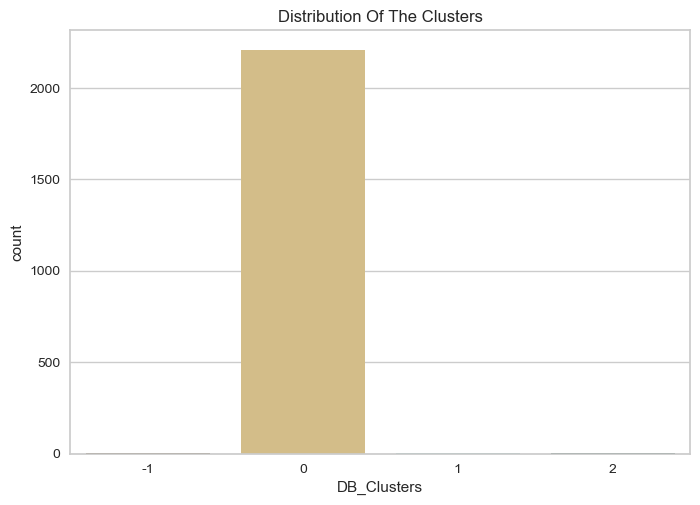

In [165]:
#Plotting countplot of clusters
pl = sns.countplot(x=scaled_ds["DB_Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

### DBSCAN fail analysis
- Struggles with high dimensional data
- Depends on a single epsilon value for all clusters, so clusters with variable densities may not be correctly identified
- Very sensitive to input parameters
- Reachable from two clusters may be arbitrarily classified

Since our data are closely distributed and the number of principal components=12, it is not suitable to use density-based clustering method such as DBSCAN for this project.

# Clustering Method Summary
- K-Means Failure Reasons:
    - clusters are spherical. Spherical assumption helps in separating the clusters when the algorithm works on the data and forms clusters.
    - clusters are of similar size. 
- DBSCAN fail analysis
    - Struggles with high dimensional data
    - Depends on a single epsilon value for all clusters, so clusters with variable densities may not be correctly identified
    - Very sensitive to input parameters
    - Reachable from two clusters may be arbitrarily classified
- Agglomerative success analysis:
    - not limited to distance-based methods
    - works well for small dataset
    -  It works from the dissimilarities between the objects to be grouped together. A type of dissimilarity can be suited to the subject studied and the nature of the data.
    

# Summary of Targeting Groups 
- Grouping criteria:
    - group 0: Low income and low spending group
    - group 1: Average income and low spending group
    - group 2: High income and high spending group
    - group 3: High income and average spending group
- Campaign responsiveness by group:
    - The majority of participants do not accpet the promotions campaigns.
    - We find that group 2 and group 3 accepts our promotions more.
- Deal responsiveness by group:
    - For the deals, they appeal most to group 1(Average income and low spending group) and 3.
    - However, our best customers cluster 2 are not attracted by deals.
- Cluster Characteristic
- Group 0:
    - The majority of group 0 is relatively young and below 50 years old
    - 0 or 1 children
- Group 1:
    - The customers in this group are relatively older
    - have children
- Group 2:
    - This group spans all ages
    - no children
- Group 3:
    - The customers in this group are relatively older
    - 1 or 2 children

# Marketing Strategies to different groups
- Strategies for Group 2 and Group 3:
    - They are high income group who often spend more and accept more promotion campaigns than other groups, so we could provide more online price incentives(online coupons, discount emails) for them.
    - They are less responsive to physical store discounts.
- Strategies for Group 0 and Group 1:
    - They are low to average income and low spending groups and they buy deals in stores, so we could increase deals in stores or mail pamphlet to their address.
    - In general, they are less responsive to online promotions and coupons.